In [265]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#show all picutures in images folder
from IPython.display import Image
import os

%matplotlib inline

#Importing the dataset

Original Image 


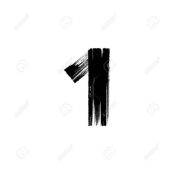

Resized Image 


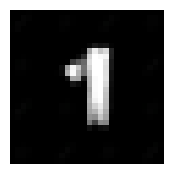

In [266]:
from PIL import Image

#import image
im = Image.open('images/DD_oneA.png')
im
#show im in size figure size 2x2
print("Original Image " )
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(im)
plt.show()

print("Resized Image " )
plt.figure(figsize=(2,2))
plt.axis('off')
im = im.resize((28,28))
im = np.array(im)
im = 255 - im
plt.imshow(im)
plt.show()


In [267]:
directory = "images"

#save im as a 28*28 pixel image
# im = im.resize((28,28))
# pixels = list(im.getdata())

handImagesDF = pd.DataFrame()

#use for loop to show all pictures in images folder
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
   
    # checking if it is a file
    if os.path.isfile(f):
        im = Image.open(f)
        im = im.resize((28,28))
        #store pixel of im into a handImagesDF dataframe with 784 pixel columns
        im = im.convert('L')
        pixels = list(im.getdata())

        #store pixel into row in handImagesDF
        handImagesDF = handImagesDF.append(pd.DataFrame(pixels).T, ignore_index=True)

/var/folders/yz/dbsffj116_9fn832qjltn9g00000gn/T/ipykernel_28087/3554963020.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  handImagesDF = handImagesDF.append(pd.DataFrame(pixels).T, ignore_index=True)


In [268]:
#add prefix "pixel" to each column name
handImagesDF.columns = ["pixel" + str(i) for i in range(784)]
handImagesDF

#subtract 255 from each pixel value
handImagesDF = 255 - handImagesDF

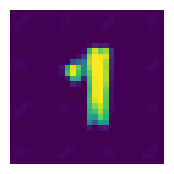

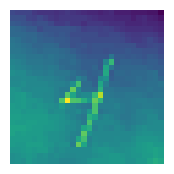

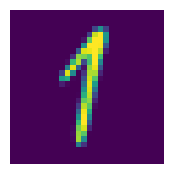

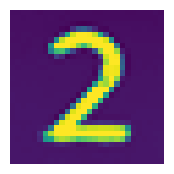

In [269]:
#for i pixelsDF, show all images
for i in range(0, len(handImagesDF)):
    #fig size
    plt.figure(figsize=(2,2))
    #hide axis and ticks labels
    plt.axis('off')
    
    # plt.imshow(handImagesDF.iloc[i].values.reshape(28,28), cmap='gray')
    # plt.show()
    plt.imshow(handImagesDF.iloc[i].values.reshape(28,28))
    plt.show()    

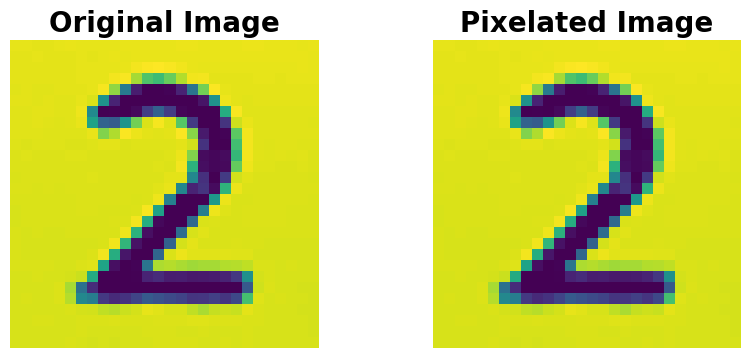

In [270]:
# python show 

#show images by side, both original and resized
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#hide axis and ticks labels for all subplots, add a box around each image
for a in ax:
    a.axis('off')
    a.set_aspect('equal')
ax[0].imshow(im)

ax[0].set_title('Original Image', fontsize=20, fontweight='bold')

ax[1].imshow(im.resize((28,28)))
ax[1].set_title('Pixelated Image',  fontsize=20, fontweight='bold')
plt.show()

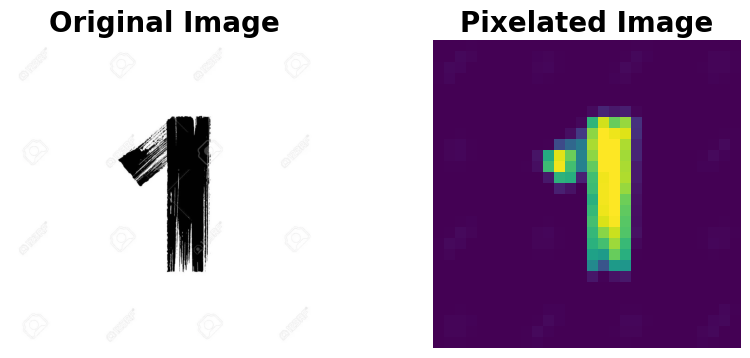

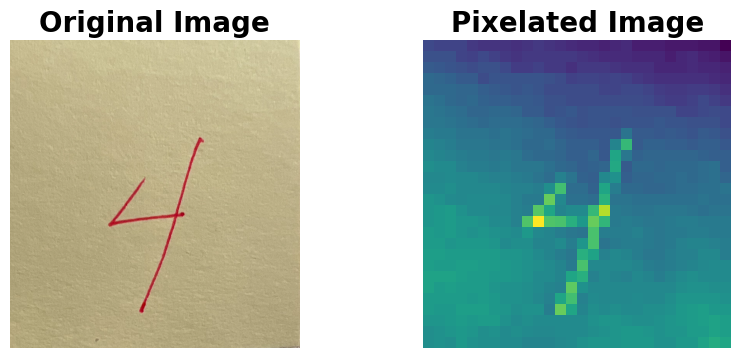

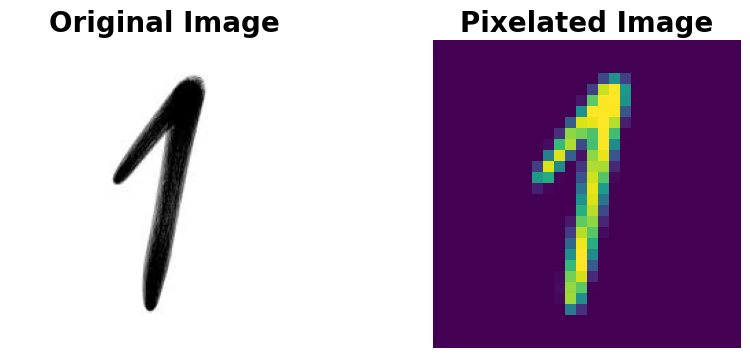

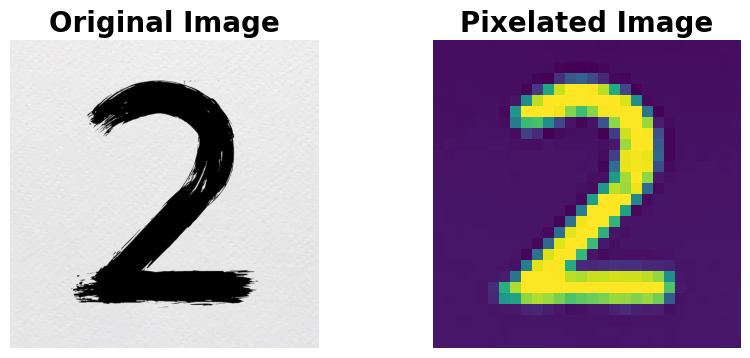

In [271]:
# for row,  filename in  handImagesDF.iterrows(), os.listdir(directory):

# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)

for element in range(len(handImagesDF)):
    #get os.listdir(directory) element
    filename = os.listdir(directory)[element]
    f = os.path.join(directory, filename)

    #get handImagesDF element
    row = handImagesDF.iloc[element]
   
    # checking if it is a file
    if os.path.isfile(f):
        original = Image.open(f)
        # im = im.resize((28,28))
    
    #show images of  both original and resized side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    #hide axis and ticks labels for all subplots, add a box around each image
    for a in ax:
        a.axis('off')
        a.set_aspect('equal')
    
    ax[0].imshow(original)
    ax[0].set_title('Original Image', fontsize=20, fontweight='bold')

    ax[1].imshow(row.values.reshape(28,28))
    ax[1].set_title('Pixelated Image',  fontsize=20, fontweight='bold')
    plt.show()

    # #add 3 mtext to the right of each set of images, in green and on figure area
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()
    # fig.text(0.9, 0.5, filename, color='green', fontsize=20, fontweight='bold', ha='center', va='center', rotation='vertical')
    # plt.show()

    # fig.text(0.5, 0.5, filename, ha='center', va='center', fontsize=20, fontweight='bold')
    # fig.text(0.5, 0.5, 'Original Image', ha='center', va='center', fontsize=20, fontweight='bold')
    # fig.text(0.5, 0.5, 'Resized Image', ha='center', va='center', fontsize=20, fontweight='bold')
    # fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    # #hide axis and ticks labels for all subplots, add a box around each image
    # for a in ax:
    #     a.axis('off')
    #     a.set_aspect('equal')
    # ax[0].text(0.5, 0.5, 'Original Image', fontsize=20, fontweight='bold')
    # ax[1].text(0.5, 0.5, 'Resized Image', fontsize=20, fontweight='bold')
    # ax[2].text(0.5, 0.5, 'Resized Image', fontsize=20, fontweight='bold')
    # plt.show()


In [272]:
data = pd.read_csv('data/train.csv')


In [ ]:
#save handImagesDF as a csv file in data folder
handImagesDF.to_csv('data/handImagesDF.csv', index=False)